Installs and imports

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as skm

In [4]:
# import college roi data
college_dat = pd.read_csv("college_roi_dat.csv")
college_dat.index = college_dat["School Name"]

In [5]:
# define features and target
features = ["School Ownership", 'Full-time Faculty Rate (%)', 'Faculty Average Salary', 'Student Enrollment Size','Attendance Cost',
            '150% Completion Rate at 4 Yr (%)', 'Admission Rate (%)', 'RetentionRate_4yr',  "Female_Majority",'SAT Average (Overall)']
X = college_dat.loc[:,features]
X.index = college_dat['School Name']

target = college_dat['Mean Earnings (6 Yrs after Entry)']
target2 = college_dat['Mean Earnings (10 Yrs after Entry)']

Xtrain, Xtest0, ytrain, ytest0 = train_test_split(X,target,random_state=4015,test_size=0.3)
Xvalid,Xtest,yvalid,ytest = train_test_split(Xtest0,ytest0, random_state=4015,test_size=0.3)

In [54]:
# read in preprocessed data
# note: filled test set is from Xtest0
X_filled = pd.read_csv("X_filled.csv",index_col="School Name")
Xtrain_filled = pd.read_csv("Xtrain_filled.csv", index_col="School Name")
Xtest_filled = pd.read_csv("Xtest_filled.csv",index_col="School Name")

# add intercept to data for linear model (linear regression) fit
# (could also use penalized regression)
X_plus = sm.add_constant(X_filled,prepend=True)
Xtrainplus = sm.add_constant(Xtrain_filled,prepend=True)
Xtestplus = sm.add_constant(Xtest_filled,prepend=True)

In [35]:
display(X_plus.head())
display(Xtrainplus.head())
display(ytrain.head())

,const,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Attendance Cost,150% Completion Rate at 4 Yr (%),Admission Rate (%),RetentionRate_4yr,Female_Majority,SAT Average (Overall),x0_Private ForProfit,x0_Private NonProfit,x0_Public
School Name,,,,,,,,,,,,,
Alabama A & M University,1.0,99.60,91188.0,5090.0,23445.0,28.66,89.65,54.03,1.0,959.0,0.0,0.0,1.0
University of Alabama at Birmingham,1.0,76.19,136560.0,13549.0,25542.0,61.17,80.60,86.40,1.0,1245.0,0.0,0.0,1.0
University of Alabama in Huntsville,1.0,67.02,116364.0,7825.0,24861.0,57.14,77.11,81.80,0.0,1300.0,0.0,0.0,1.0
Alabama State University,1.0,67.97,86328.0,3603.0,21892.0,31.77,98.88,62.02,1.0,938.0,0.0,0.0,1.0
The University of Alabama,1.0,77.07,124188.0,30610.0,30016.0,72.14,80.39,87.23,1.0,1262.0,0.0,0.0,1.0


,const,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Attendance Cost,150% Completion Rate at 4 Yr (%),Admission Rate (%),RetentionRate_4yr,Female_Majority,SAT Average (Overall),x0_Private ForProfit,x0_Private NonProfit,x0_Public
School Name,,,,,,,,,,,,,
Saginaw Valley State University,1.0,50.28,101148.0,6953.0,22353.0,47.88,89.460000,77.37,1.0,1086.000000,0.0,0.0,1.0
Centre College,1.0,93.20,99564.0,1333.0,56645.0,83.16,72.080000,89.30,1.0,1325.000000,0.0,1.0,0.0
SUNY Empire State College,1.0,22.53,89832.0,8221.0,19726.0,27.03,70.226986,64.91,1.0,1142.511968,0.0,0.0,1.0
Boise Bible College,1.0,90.00,54900.0,94.0,24258.0,38.64,90.380000,66.67,0.0,988.000000,0.0,1.0,0.0
West Coast University-Dallas,1.0,25.56,88980.0,1182.0,27991.0,100.00,70.226986,0.00,1.0,1142.511968,1.0,0.0,0.0


School Name
Saginaw Valley State University    35400.0
Centre College                     38500.0
SUNY Empire State College          42200.0
Boise Bible College                26900.0
West Coast University-Dallas       71900.0
Name: Mean Earnings (6 Yrs after Entry), dtype: float64

In [56]:
# Fit and summarize OLS model
# endog = y, exog = x
mod = sm.OLS(ytrain, Xtrainplus)
ols_res = mod.fit()
print(ols_res.summary())
#                             OLS Regression Results                            
# ==============================================================================
# Dep. Variable:                  GRADE   R-squared:                       0.416
# Model:                            OLS   Adj. R-squared:                  0.353
# Method:                 Least Squares   F-statistic:                     6.646
# Date:                Fri, 05 May 2023   Prob (F-statistic):            0.00157
# Time:                        13:59:54   Log-Likelihood:                -12.978
# No. Observations:                  32   AIC:                             33.96
# Df Residuals:                      28   BIC:                             39.82
# Df Model:                           3                                         
# Covariance Type:            nonrobust                                         
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# GPA            0.4639      0.162      2.864      0.008       0.132       0.796
# TUCE           0.0105      0.019      0.539      0.594      -0.029       0.050
# PSI            0.3786      0.139      2.720      0.011       0.093       0.664
# const         -1.4980      0.524     -2.859      0.008      -2.571      -0.425
# ==============================================================================
# Omnibus:                        0.176   Durbin-Watson:                   2.346
# Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.167
# Skew:                           0.141   Prob(JB):                        0.920
# Kurtosis:                       2.786   Cond. No.                         176.
# ==============================================================================

# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


                                    OLS Regression Results                                   
Dep. Variable:     Mean Earnings (6 Yrs after Entry)   R-squared:                       0.439
Model:                                           OLS   Adj. R-squared:                  0.434
Method:                                Least Squares   F-statistic:                     85.65
Date:                               Fri, 15 Dec 2023   Prob (F-statistic):          1.26e-142
Time:                                       11:53:24   Log-Likelihood:                -12733.
No. Observations:                               1215   AIC:                         2.549e+04
Df Residuals:                                   1203   BIC:                         2.555e+04
Df Model:                                         11                                         
Covariance Type:                           nonrobust                                         
                                       coef    std err      

There definitely appears to be collinearity here, as terms like full-time faculty rate and retention rates have negative coefficients, not aligned with relationships shwon by exploratory analysis.
I explore this collinearity and these relationships with the correlation matrix below.

In [9]:
# see range of values for numeric variables
X_filled.assign(y6 = target,y10=target2).describe()

,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Attendance Cost,150% Completion Rate at 4 Yr (%),Admission Rate (%),RetentionRate_4yr,SAT Average (Overall),y6,y10
count,1700.000000,1720.000000,1735.000000,1652.000000,1665.000000,1476.000000,1657.000000,1060.000000,1736.000000,1707.000000
mean,65.420712,96844.172093,5001.518732,38032.791162,55.156354,70.078686,74.219813,1142.497170,39203.571429,50261.862917
std,26.933711,31461.827918,8442.298665,17114.296557,19.858825,20.193190,14.072419,130.185605,11389.718248,16219.323778
min,0.000000,11916.000000,13.000000,5663.000000,0.000000,5.010000,0.000000,842.000000,13300.000000,18000.000000
25%,45.882500,77220.000000,900.000000,23588.500000,42.920000,59.880000,67.590000,1053.000000,32700.000000,40850.000000
50%,68.275000,91572.000000,1894.000000,34450.000000,55.330000,74.025000,76.160000,1117.000000,37600.000000,47900.000000
75%,89.300000,112833.000000,5244.000000,50152.750000,68.530000,84.525000,83.170000,1207.000000,43100.000000,55550.000000
max,100.000000,253716.000000,109233.000000,81531.000000,100.000000,100.000000,100.000000,1566.000000,104500.000000,171800.000000


<Axes: >

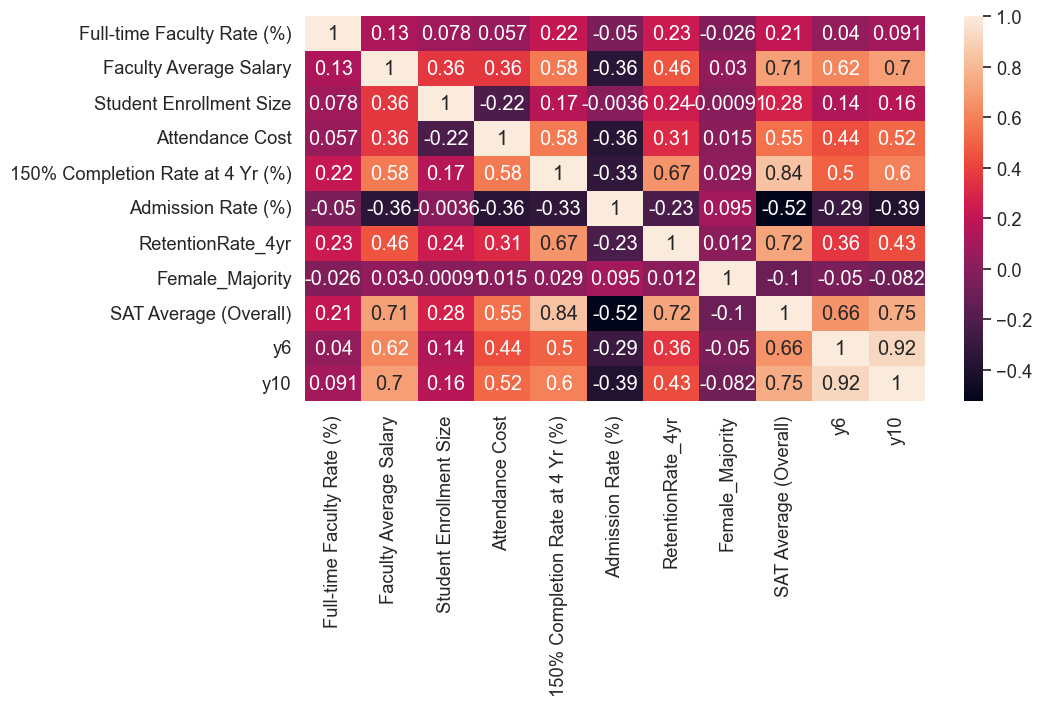

In [14]:
sns.set(rc={'figure.figsize':(10,5)},font_scale = 1.2)
sns.heatmap(X_filled.assign(y6 = target,y10=target2).corr(),annot=True)

After examining the correlation matrix above, it appears that there is multicollinearity inherent in the features, and this is likely affecting the sign and the significance of retention rate. Full-time faculty rate may also be affected by multicollinearity, but these seems less likely after examining the correlation matrix, and after seeing the correlation coefficient of this variable with the response it appears that the effect of full-time faculty rate may in fact be negligible towards salary post college entry.

In [61]:
# evaluate performance
print("Test R^2:", skm.r2_score(ytest0,ols_res.predict(Xtestplus)))
print("Test RMSE:", np.sqrt(skm.mean_squared_error(ytest0,ols_res.predict(Xtestplus))))
print("Test Scaled RMSE:", np.sqrt(skm.mean_squared_error(ytest0,ols_res.predict(Xtestplus)))/np.std(ytest0))

Test R^2: 0.44748054785206115
Test RMSE: 8249.580305740019
Test Scaled RMSE: 0.7433165221814584


### Lasso Regression
Here I fit a lasso regression model, another supervized learning technique that requires minimal hyperparameter tuning.
This model can hopefully account for multicollinearity and possible overfitting using regularization.


In [40]:
lcv = LassoCV(cv=10)
lcv.fit(Xtrain_filled,ytrain)

LassoCV(cv=10)

In [41]:
lcv.intercept_

14836.017106591513

In [42]:
print(Xtrain_filled.columns)
lcv.coef_

Index(['Full-time Faculty Rate (%)', 'Faculty Average Salary',
       'Student Enrollment Size', 'Attendance Cost',
       '150% Completion Rate at 4 Yr (%)', 'Admission Rate (%)',
       'RetentionRate_4yr', 'Female_Majority', 'SAT Average (Overall)',
       'x0_Private ForProfit', 'x0_Private NonProfit', 'x0_Public'],
      dtype='object')


array([-0.        ,  0.20103845, -0.05418036,  0.13711167,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ])

In [21]:
lcv.alpha_

219003.25418410942

In [46]:
# test out predictions: are they on the right scale?
lcv.predict(X=Xtest_filled)[0:4]

array([36447.91613589, 40822.04615937, 46322.48825694, 37832.10364227])

In [63]:
print("Test R^2:", lcv.score(Xtest_filled,ytest0))
print(f'RMSE: {np.sqrt(skm.mean_squared_error(ytest0,lcv.predict(Xtest_filled)))}')
print(f'Scaled RMSE (num sds): {np.sqrt(skm.mean_squared_error(ytest0,lcv.predict(Xtest_filled)))/np.std(ytest0)}')
# results are not horrible
# only slightly worse than linear regression (from a fit and prediction sense)

Test R^2: 0.43449822798218163
RMSE: 8345.936063694686
Scaled RMSE (num sds): 0.7519985186274093


In [62]:
print(lcv.score(X_filled,target)) # R^2
print(lcv.score(Xtrain_filled,ytrain)) # R^2 train
print("Test R^2:", lcv.score(Xtest_filled,ytest0)) # R^2 test (equivalent to `skm.r2_score(ytest0,lcv.predict(Xtest_filled))`)
# could be evidenve of some underfitting, but this is an OK R^2 estimate

0.4166618452372025
0.40890761478169924
Test R^2: 0.43449822798218163


Interesting to see how lasso, which regularized the feature set to only include 3 features, still had almost identical fit and performance to linear regression.
(It will be interesting to see how nonparametric methods perform in comparison: especially those that have implicity regularization like a random forest)